_In this notebook, every question will be marked by a blue border, and answers should be provided in cells in a green border. All code-related answers are preceded by a #TODO._

## Students

 - SELLAMI Kais B2
 - MARTIN Cédric B2

## Objectives of the practical work

The objective is to get hands on experience on the fundamental elements of neural networks:
 
 - perceptron architecture (linear regression)
 - loss function
 - empirical loss
 - gradient descent

For this we will implement from scratch the data-structure and algorithms to train a perceptron. Note that slides related to the perceptron and neural networks in general are available on [moodle](https://moodle.insa-toulouse.fr/course/view.php?id=1790).

## Dataset

The objective of the regression is the prediction of the hydrodynamic performance of sailing yachts from dimensions and velocity.
The **inputs** are linked to dimension and hydrodynamics characteristics:
1. Longitudinal position of the center of buoyancy
(*flottabilité*), adimensional.
2. Prismatic coefficient, adimensional.
3. Length-displacement ratio, adimensional.
4. Beam -draught ratio ((*tiran d’eau*), adimensional.
5. Length-beam ratio, adimensional.
6. Froude number, adimensional

**Target value/predicted value (Output)** = Residuary resistance per unit weight of
displacement, adimensional

In [1]:
# Import some useful libraries and functions

import numpy as np
import pandas

def print_stats(dataset):
    
    """Print statistics of a dataset"""
    print(pandas.DataFrame(dataset).describe())


In [2]:
# Download the data set and place in the current folder (works on linux only)
filename = 'yacht_hydrodynamics.data'

import os.path
import requests

if not os.path.exists(filename):
    print("Downloading dataset...")
    r = requests.get('https://arbimo.github.io/tp-supervised-learning/tp1/' + filename)
    open(filename , 'wb').write(r.content)
    
print('Dataset available')

Dataset available


<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
### Explore the dataset

- how many examples are there in the dataset?
- how many features for each example?
- what is the ground truth of the 10th example
</div>
<!-- Question End -->

In [3]:
# load the dataset and slip between inputs (X) and ground truth (Y)
dataset = np.genfromtxt("yacht_hydrodynamics.data", delimiter='')
X = dataset[:, :-1] # examples features -  all rows with all elements in rows except last one
Y = dataset[:, -1]  # ground truth - last element in all rows

# Print the first 5 examples
for i in range(0,5):
    print(f"f({X[i]}) = {Y[i]}")

f([-5.    0.6   4.78  4.24  3.15  0.35]) = 8.62
f([-5.     0.565  4.77   3.99   3.15   0.15 ]) = 0.18
f([-2.3    0.565  4.78   5.35   2.76   0.15 ]) = 0.29
f([-5.     0.6    4.78   4.24   3.15   0.325]) = 6.2
f([0.    0.53  4.78  3.75  3.15  0.175]) = 0.59


In [4]:
# TODO : explore the dataset
print ("Dataset statistics : ")
print ("Number of Features :", len(X[0]))
print ("Number of Exemple :", len(X))
print ("Ground truth for 10th Exemple :", Y[9])
print (X[0])


Dataset statistics : 
Number of Features : 6
Number of Exemple : 308
Ground truth for 10th Exemple : 1.83
[-5.    0.6   4.78  4.24  3.15  0.35]


<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**

Number of Exemple : 308<p></p>
Number of Features : 6 <p></p>
Ground truth for 10th Exemple : 1.83






</div>
<!-- Answer Section End -->

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
The following command adds a column to the inputs.

- what is in the value added this column?
- why are we doing this?
</div>
<!-- Question End -->

In [5]:
X = np.insert(X, 0, np.ones((len(X))), axis= 1)
print_stats(X)

           0           1           2           3           4           5  \
count  308.0  308.000000  308.000000  308.000000  308.000000  308.000000   
mean     1.0   -2.381818    0.564136    4.788636    3.936818    3.206818   
std      0.0    1.513219    0.023290    0.253057    0.548193    0.247998   
min      1.0   -5.000000    0.530000    4.340000    2.810000    2.730000   
25%      1.0   -2.400000    0.546000    4.770000    3.750000    3.150000   
50%      1.0   -2.300000    0.565000    4.780000    3.955000    3.150000   
75%      1.0   -2.300000    0.574000    5.100000    4.170000    3.510000   
max      1.0    0.000000    0.600000    5.140000    5.350000    3.640000   

                6  
count  308.000000  
mean     0.287500  
std      0.100942  
min      0.125000  
25%      0.200000  
50%      0.287500  
75%      0.375000  
max      0.450000  


<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**

The value in the column are all 1<p></p>
We do this to add a bias




</div>
<!-- Answer Section End -->

## Creating the perceptron

![Perceptron for regression](https://arbimo.github.io/tp-supervised-learning/2223-ae/tp1/perceptron-regression.png)

We now want to define a perceptron, that is, a function of the form: 

$h_w(x) = w_0 + w_1 \times x_1 + \dots + w_n \times x_n$

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
- Complete the code snippet below to:
  - create the vector of weight `w`, initialize to arbitrary values (we suggest 0)
  - implement the `h` function that evaluate an example based on the vector of weights
  - check if this works on a few examples
</div>
<!-- Question End -->

In [10]:
# TODO
w = np.zeros(7) # initialize w to 0

def h(w, x):
    W = np.dot(x,w)
    return W

# print the ground truth and the evaluation of h_w on the first example
print(h(w, X)) # should give array of len(X) zeros
print(len(X), len(h(w, X)))
print(h(w, X[0])) #should give 0 as all weights are equal to zero

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
308 308
0.0


## Loss function
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
Complete the definiton of the loss function below such that, for a **single** example `x` with ground truth `y`, it returns the $L_2$ loss of $h_w$ on `x`.
</div>
<!-- Question End -->

In [13]:
# TODO
def loss(w, x, y):
    return (h(w,x)-y)**2
print("loss(w,x,y) = ", loss(w, X, Y)) # should be equal to y**2
#print(loss(w, X, Y)-Y*Y) #all zeros

loss(w,x,y) =  [7.4304400e+01 3.2400000e-02 8.4100000e-02 3.8440000e+01 3.4810000e-01
 3.3124000e+00 3.1214569e+03 2.0250000e-01 1.1902500e+01 3.3489000e+00
 1.0536516e+03 6.0516000e+00 6.4000000e-03 2.2290490e+02 1.8496000e+00
 1.1985444e+03 1.5210000e-01 1.6281760e+02 1.1881000e+00 1.7161000e+00
 1.3616100e+01 1.0725625e+03 9.2903040e+02 3.4225000e+00 1.2100000e-02
 3.1024900e+01 4.0561960e+02 1.3972644e+03 6.8644000e+00 2.6936100e+01
 3.8962564e+03 6.0840000e-01 4.2559690e+02 3.0976000e+00 1.1449000e+00
 2.4649000e+00 3.0437289e+03 2.9268100e+01 5.1265600e+01 1.3363360e+02
 5.6250000e-01 3.9816100e+01 4.9729000e+00 8.4681000e+00 7.6729000e+00
 2.4010000e-01 5.8273960e+02 5.4289000e+00 2.2090000e-01 1.7108640e+02
 2.0449000e+00 1.4376010e+02 6.2500000e-02 4.0960000e-01 4.2025000e+00
 7.3960000e-01 6.7081000e+00 4.3560000e-01 6.4000000e-03 1.4440000e-01
 8.0089000e+00 1.2702096e+03 1.8769000e+00 2.1160000e-01 2.5000000e-03
 6.8644000e+00 1.3690000e-01 9.5481000e+00 4.0960000e-01 7.452

## Empirical loss
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
Complete the function below to compute the empirical loss of $h_w$ on a **set** of examples $X$ with associated ground truths $Y$.
</div>
<!-- Question End -->

In [14]:
# TODO
def emp_loss(w, X, Y):
    return np.mean(loss(w,X,Y))
print("empirical loss = ", emp_loss(w, X, Y))

empirical loss =  339.24674642857144


## Gradient update

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
A gradient update is of the form: $w \gets w + dw$

- Complete the function below so that it computes the $dw$ term (the 'update') based on a set of examples `(X, Y)` the step (`alpha`)

(you can look at slide 18 of the perceptron lecture slides for an example)
</div>
<!-- Question End -->

In [15]:
# TODO
def compute_update(w, X, Y, alpha):

    return alpha * np.dot(Y- h(w,X), X)


compute_update(w, X, Y, alpha = 10e-7)


array([ 0.00323257, -0.00756342,  0.00182051,  0.01547611,  0.01269435,
        0.01036508,  0.00130996])

## Gradient descent
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
Now implement the gradient descent algorithm that will:

- repeatedly apply an update the weights 
- stops when a max number of iterations is reached (do not consider early stopping for now)
- returns the final vector of weights
</div>
<!-- Question End -->

In [16]:
# TODO
def descent(w_init, X, Y, alpha, max_iter):
    w = w_init
    for i in range(max_iter):
        w += compute_update(w, X, Y, alpha)
    return w


## Exploitation
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
You gradient descent is now complete and you can exploit it to train your perceptron.

- Train your perceptron to get a model.
- Visualize the evolution of the loss on the training set. Has it converged?
- Try training for several choices of `alpha` and `max_iter`. What seem like a reasonable choice?
- What is the loss associated with the final model?
- Is the final model the optimal one for a perceptron?
</div>
<!-- Question End -->

In [22]:
# TODO

for i in range(-10,-3):
    w = np.zeros(7) # reset w to 0
    w = descent(w, X, Y,10**i,1000)
    print("empirical loss for i =",i," = ", emp_loss(w, X, Y))
    print("w = ", w)



empirical loss for i = -10  =  338.87027006866913
w =  [ 0.00032298 -0.00075566  0.0001819   0.00154628  0.00126834  0.00103562
  0.00013092]
empirical loss for i = -9  =  335.53991812384675
w =  [ 0.00320504 -0.00749521  0.00180498  0.01534396  0.01258535  0.0102767
  0.00130204]
empirical loss for i = -8  =  307.3625351836932
w =  [ 0.02970958 -0.06915291  0.01672858  0.14220296  0.11658521  0.095252
  0.01234722]
empirical loss for i = -7  =  233.546665715086
w =  [ 0.15526305 -0.34060817  0.08723445  0.74118756  0.60427698  0.49717536
  0.08268246]
empirical loss for i = -6  =  228.7348014142886
w =  [ 0.21022896 -0.17194535  0.11470446  0.96699115  0.72762126  0.66113694
  0.44026962]
empirical loss for i = -5  =  220.03664131768593
w =  [0.31890362 0.16067587 0.14331884 1.09823935 0.36840143 0.82207219
 3.83641291]
empirical loss for i = -4  =  158.7773625499346
w =  [ 0.65627602  0.19264705  0.08773677  0.6276117  -0.42696164 -0.16117787
 32.83363884]


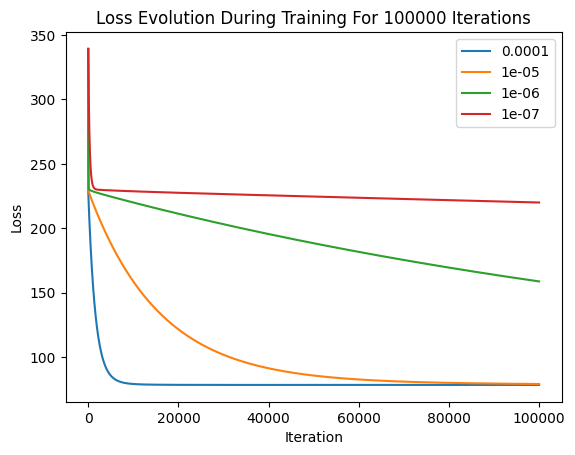

In [59]:
import matplotlib.pyplot as plt

def plot_loss_evolution(w, X, Y, alpha, num_iterations):
    loss_history = []
    
    for i in range(num_iterations):
        current_loss = emp_loss(w, X, Y)
        loss_history.append(current_loss)
        w = descent(w, X, Y, alpha, 1)
    
    plt.plot(loss_history, label=alpha)
    plt.title('Loss Evolution During Training For %i' %num_iterations + ' Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    return loss_history



for i in [10**-4, 10**-5, 10**-6, 10**-7]:
    w = np.zeros(7) 
    plot_loss_evolution(w, X, Y,i,100000)


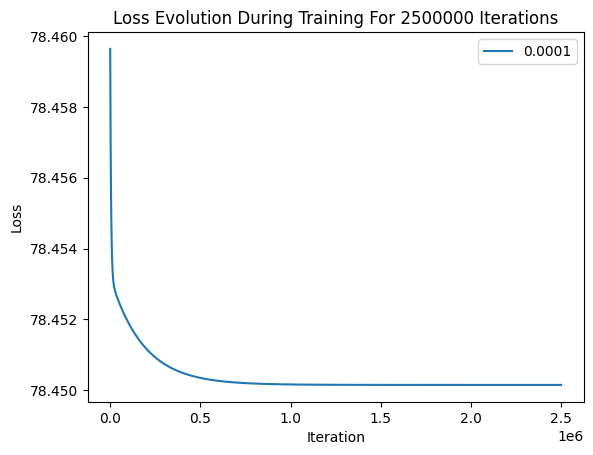

In [45]:
plot_loss_evolution(w, X, Y,10**-4,2500000) # to show that even the 10e-6 converges
plt.show()


In [58]:
w = np.zeros(7)
print('Final loss = ', emp_loss(descent(w, X, Y, 10**-4, 10000), X, Y))

Final loss =  79.17212422317368


<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**
    
All of the configurations tested above converged (each to a different value and after a different number of iteration)

    
Training for a maximum number of iteration = 10000, and an alpha = 1e-4 seems to be the best configuration as it converges to the lowest loss in the figure the faster possible. 
    
The final loss for this configuration = 79.17

This configuration is not necessarily optimum as the emperical loss is not the only criteria of the optimality. Especially knowing that an emperical loss of zero is actually only an overfitting that leads to misbehaving on newer data.



</div>
<!-- Answer Section End -->

Text(0, 0.5, 'f(examples)')

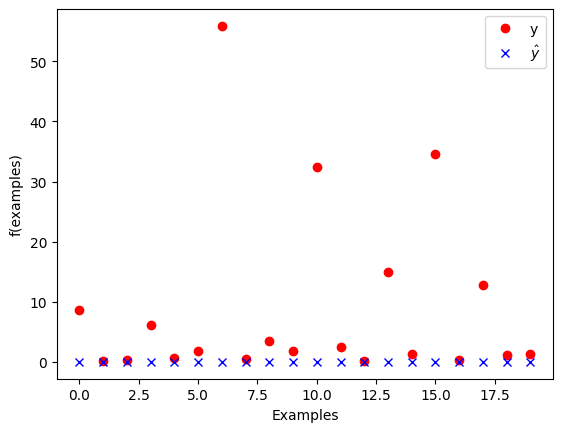

In [25]:
# Code sample that can be used to visualize the difference between the ground truth and the prediction

num_samples_to_plot = 20
plt.plot(Y[0:num_samples_to_plot], 'ro', label='y')
yw = [h(w,x) for x in X]
plt.plot(yw[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
plt.xlabel("Examples")
plt.ylabel("f(examples)")





# Going further

The following are extensions of the work previously done. If attempting them **do not modify** the code you produced above so that it can be evaluated.


### Data normalization

Different input features can have different units, and very different ranges.
Within the perceptron computation, these values will be summed together.
While gradient descent is normally able to deal with this (by adapting the weights of the perceptron for each input feature), standardizing the input features usually eases the perceptron training, and can sometimes improve accuracy.




```python
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(copy=True) 
X_normalized = sc.fit_transform(X)
```
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
Try applying a standard normalization to the input features (make sure that you keep a feature column that is always equal to 1). Is the convergence faster ? Try to quantify this speed-up. What about accuracy ?
</div>
<!-- Question End -->


### Improvements to gradient descent

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
Consider improving the gradient descent with:

 - Stochastic Gradient Descent (SGD), which means selecting a subset of the examples for training
 - Detection of convergence to halt the algorithm before the maximum number of iterations
</div>
<!-- Question End -->


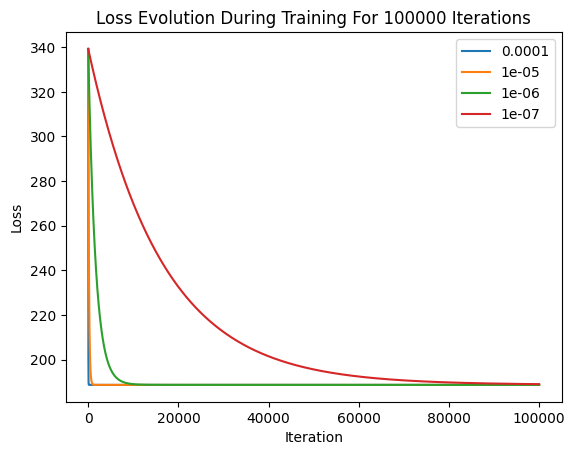

In [49]:
#TODO
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(copy=True) 
X_normalized = sc.fit_transform(X)

for i in [10**-4, 10**-5, 10**-6, 10**-7]:
    w = np.zeros(7) 
    plot_loss_evolution(w, X_normalized, Y,i,100000)

For the normalized input, w converges a lot more rapidly. We can retest on our best configuration to tell the exact value belox

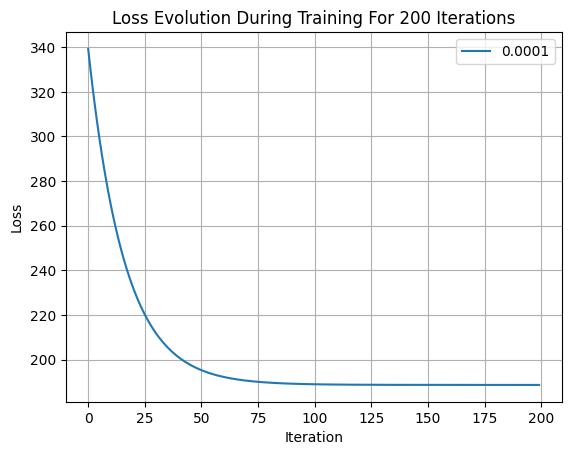

188.62246442524568


In [76]:
w = np.zeros(7)
plot_loss_evolution(w, X_normalized, Y,10**-4,200)
plt.grid(True)
plt.show()
print(emp_loss(descent(w, X_normalized, Y, 10**-4,200), X_normalized, Y))

It converges in 100 iteration (meaning 100 times less than without normalization)

In [81]:
w = np.zeros(7)
w = descent(w, X_normalized, Y, 10**-4, 100)
print('Final loss = ', emp_loss(w, X_normalized, Y))

Final loss =  188.91438298236432


<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**
It is completely normal that the convergence value changes as we normalized X but not the labels.







</div>
<!-- Answer Section End -->

In [95]:
def stochastic_descent(w, X, Y, alpha=1e-4, max_iter=1000, batch_size=32, tol=1e-6):
    n_samples = X.shape[0]
    loss_history = []

    for i in range(max_iter):
        indices = np.random.choice(n_samples, size=batch_size, replace=False)
        X_batch = X[indices]
        Y_batch = Y[indices]

        w += alpha * np.dot((Y_batch - h(w, X_batch)), X_batch)
        loss_history.append(emp_loss(w, X, Y))

        if i > 0 and abs(loss_history[-2] - loss_history[i]) < tol:
            print(f"Converged at iteration {i}")
            break

    return w, loss_history


Converged at iteration 5690


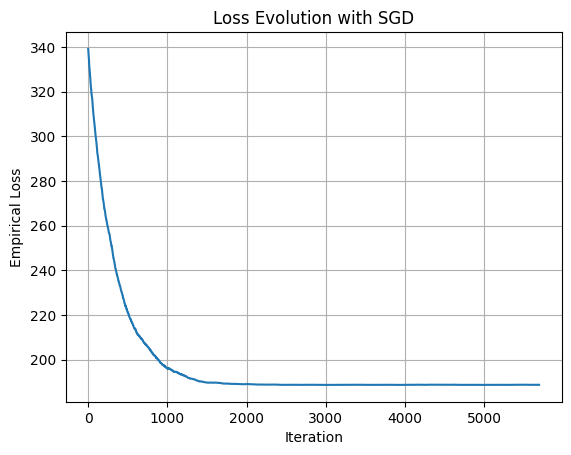

In [97]:
w = np.zeros(7)
w_sgd, losses_sgd = stochastic_descent(w, X_normalized, Y, alpha=1e-4, max_iter=10000, batch_size=16)
plt.plot(losses_sgd)
plt.xlabel("Iteration")
plt.ylabel("Empirical Loss")
plt.title("Loss Evolution with SGD")
plt.grid(True)
plt.show()

In [ ]:
print('loss', emp_loss())